In [1]:
 #to predict whether the candidate gets placed or not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("../input/job-placement-dataset/Job_Placement_Data.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
dataset.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [6]:
dataset.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

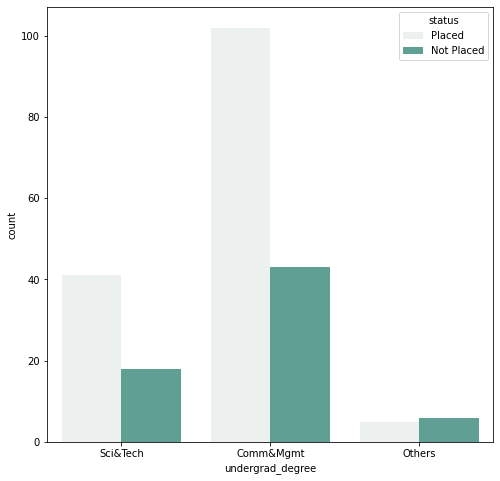

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(data=dataset,x=dataset['undergrad_degree'],hue="status",palette = 'light:#5A9')
plt.show()

<AxesSubplot:xlabel='count', ylabel='hsc_subject'>

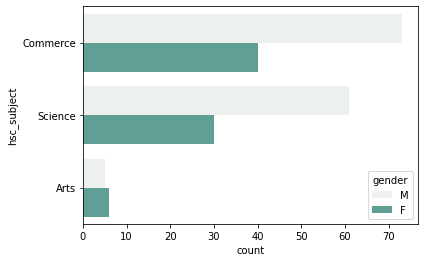

In [8]:
sns.countplot(data=dataset,y=dataset['hsc_subject'],hue="gender",palette = 'light:#5A9')

In [9]:
for i in dataset.columns:
    if dataset[i].dtypes=="object":
        print(f"{i} column unique value numbers:",dataset[i].nunique())

gender column unique value numbers: 2
ssc_board column unique value numbers: 2
hsc_board column unique value numbers: 2
hsc_subject column unique value numbers: 3
undergrad_degree column unique value numbers: 3
work_experience column unique value numbers: 2
specialisation column unique value numbers: 2
status column unique value numbers: 2


In [10]:
dataset=pd.get_dummies(dataset) #onehot encoding
#label endocing
'''le=LabelEncoder()
for i in dataset.columns:
    if dataset[i].dtypes=="object":
        dataset[i]=le.fit_transform(dataset[i])'''
        
dataset.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_F,gender_M,ssc_board_Central,ssc_board_Others,hsc_board_Central,...,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_No,work_experience_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,1,0,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1


<AxesSubplot:>

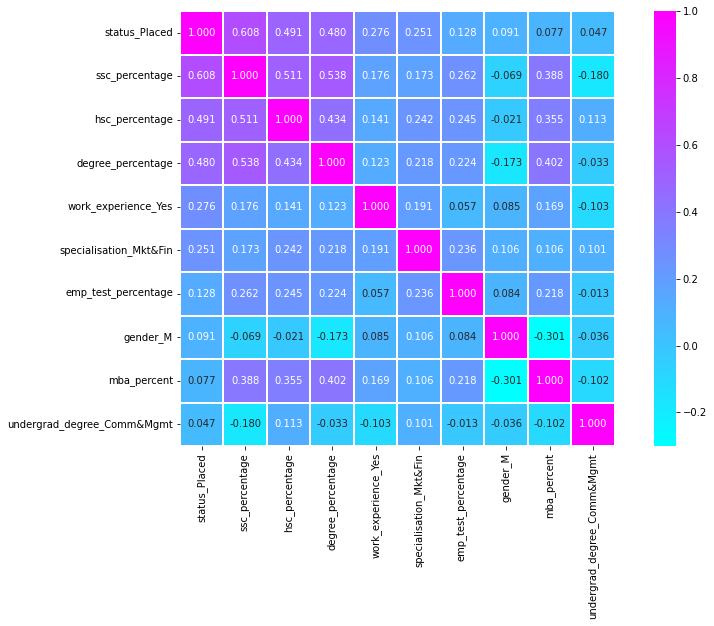

In [11]:
plt.figure(figsize=(14,8))
corr=dataset.corr().nlargest(10,'status_Placed')['status_Placed'].index
corr_matrix=np.corrcoef(dataset[corr].values.T)
sns.heatmap(corr_matrix,annot=True,square=True,fmt='.3f',linewidth=0.2,vmax=1,cmap='cool',yticklabels=corr.values,xticklabels=corr.values)

In [12]:
from sklearn.model_selection import train_test_split
y=dataset.iloc[:,-1:]
x=dataset.iloc[:,:-2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features= 10)
model = rf.fit(x_train,y_train.values.ravel())
prediction=rf.predict(x_test)
print(classification_report(y_test,prediction,target_names=['status_Not_Placed','status_Placed']))
print('Accuracy Score:',accuracy_score(y_test,prediction)) # (10+42)/(19+46)

                   precision    recall  f1-score   support

status_Not_Placed       0.71      0.53      0.61        19
    status_Placed       0.82      0.91      0.87        46

         accuracy                           0.80        65
        macro avg       0.77      0.72      0.74        65
     weighted avg       0.79      0.80      0.79        65

Accuracy Score: 0.8


Text(83.40000000000006, 0.5, 'actual label')

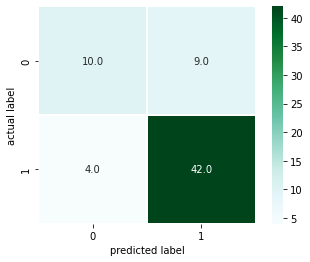

In [14]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,square=True,fmt='.1f',linewidth=0.3,cmap='BuGn')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [15]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=0)
rfc_param={
    'max_depth':[5,6,7,8],
    'max_features':['auto','log2'],
    'criterion':['entropy','gini'],
    'n_estimators':[100,200]
}

In [16]:
grd=GridSearchCV(estimator=rfc,param_grid=rfc_param,cv=5)
model2=grd.fit(x_train,y_train.values.ravel())
model2

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200]})

In [17]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [18]:
rfc_best=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=100)
model2=rfc_best.fit(x_train,y_train.values.ravel())
prediction2=rfc_best.predict(x_test)
print(classification_report(y_test,prediction2,target_names=['status_Not_Placed','status_Placed']))
print('Accuracy Score:',accuracy_score(y_test,prediction2))

                   precision    recall  f1-score   support

status_Not_Placed       0.73      0.58      0.65        19
    status_Placed       0.84      0.91      0.87        46

         accuracy                           0.82        65
        macro avg       0.79      0.75      0.76        65
     weighted avg       0.81      0.82      0.81        65

Accuracy Score: 0.8153846153846154


Text(83.40000000000006, 0.5, 'actual label')

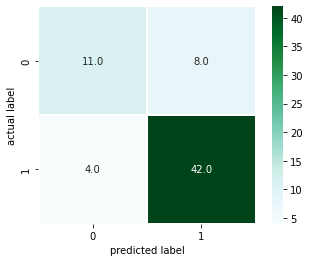

In [19]:
cm2=confusion_matrix(y_test,prediction2)
sns.heatmap(cm2,annot=True,square=True,fmt='.1f',linewidth=0.3,cmap='BuGn')
plt.xlabel('predicted label')
plt.ylabel('actual label')